In [1]:
%matplotlib inline
DEFAULT_FIGSIZE = (16, 12)

import itertools
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd

sys.path.append('..')
from antlia.plotdf import plotjoint

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE

In [2]:
braking_df = pd.read_pickle('trial2_braking_ttc.p.gz')

In [26]:
import enum

class BrakingType(enum.Enum):
    Constant = 0
    Increasing = 1
    TwoStage = 2
    
    def __str__(self):
        return self.name
    
    def __float__(self):
        return float(self.value)
    

braking_df['braking type'] = [
    # rider 0
    BrakingType.TwoStage,
    BrakingType.TwoStage,
    BrakingType.TwoStage,
    
    BrakingType.Constant,
    BrakingType.Increasing,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Increasing,
    
    # rider 1
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    # rider 2
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    # rider 3
    BrakingType.Constant,
    BrakingType.TwoStage,
    BrakingType.Constant,
    
    BrakingType.TwoStage,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.TwoStage,
    
    # rider 4
    BrakingType.Constant,
    BrakingType.Increasing,
    BrakingType.Increasing,
    
    BrakingType.Constant,
    BrakingType.TwoStage,
    BrakingType.Increasing,
    
    BrakingType.Increasing,
    BrakingType.Increasing,
    BrakingType.Constant,
    
    # rider 5
    BrakingType.Constant,
    BrakingType.Increasing,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.Constant,
    
    # rider 6
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Increasing,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.TwoStage,
    BrakingType.TwoStage,
    
    # rider 7
    BrakingType.Constant,
    BrakingType.Constant,
    BrakingType.Constant,
    
    BrakingType.Constant,
    BrakingType.TwoStage,
    BrakingType.TwoStage,
    
    BrakingType.TwoStage,
    BrakingType.TwoStage,
    BrakingType.Constant,
]

In [27]:
df = braking_df.drop([
    'linregress intercept',
    'braking starttime',
    'braking endtime',
    'window size',
    'lockup ranges'
], axis=1)

cols = df.columns.tolist()
cols = cols[-5:] + cols[:-5]
df = df[cols]
    
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'float_format', '{:0.3f}'.format):
    display(df)

,rider id,trial id,distance-to-collision,time-to-collision,braking type,linregress slope,linregress r-value,linregress p-value,linregress stderr,starting velocity,braking duration,braking distance
0,0,0,7.785,1.971,TwoStage,-0.886,-0.933,0.000,0.016,3.950,3.776,8.003
1,0,1,8.669,1.743,TwoStage,-1.452,-0.910,0.000,0.035,4.973,2.916,8.681
2,0,2,10.068,1.689,TwoStage,-1.976,-0.923,0.000,0.044,5.960,2.800,10.211
3,0,6,7.749,1.650,Constant,-1.698,-0.901,0.000,0.046,4.697,2.520,7.683
4,0,7,4.164,1.263,Increasing,-1.569,-0.890,0.000,0.054,3.297,1.760,3.954
5,0,8,9.867,1.624,Constant,-1.990,-0.925,0.000,0.044,6.077,2.736,9.818
6,0,12,11.586,1.892,Constant,-1.743,-0.912,0.000,0.040,6.124,3.116,11.717
7,0,13,3.219,0.972,Constant,-2.142,-0.884,0.000,0.088,3.311,1.336,3.053
8,0,14,6.933,1.423,Increasing,-1.997,-0.916,0.000,0.052,4.872,2.232,6.864
9,1,3,13.000,2.806,Constant,-0.816,-0.927,0.000,0.013,4.634,5.137,12.313


In [32]:
for t in BrakingType:
    print(t, t.value)

Constant 0
Increasing 1
TwoStage 2


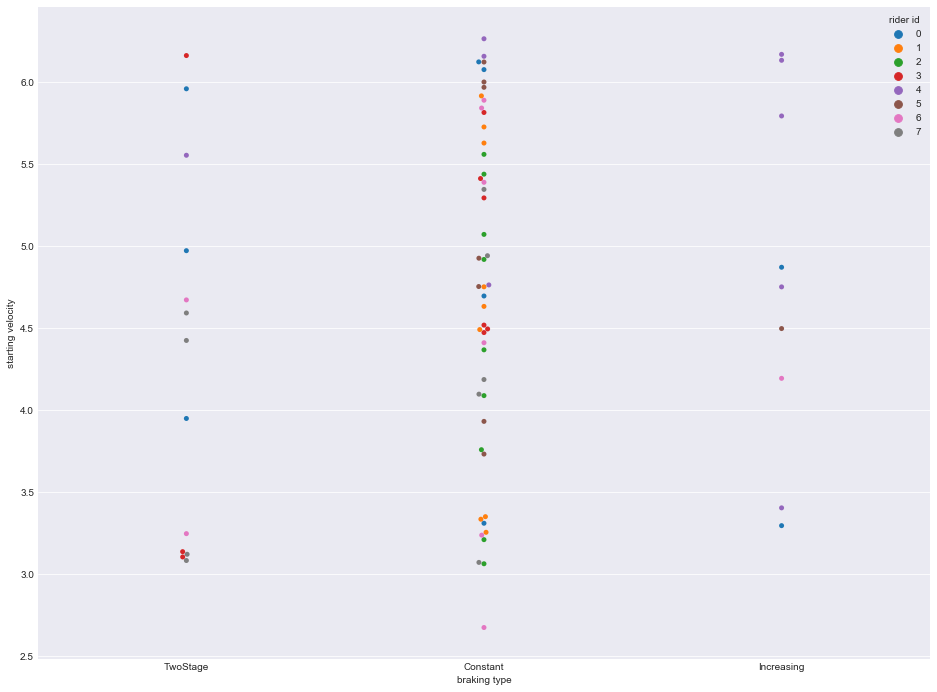

In [43]:
from antlia.plotdf import plotjoint

colors = sns.color_palette('tab10', 10)

plt.close('all')

fig, ax = plt.subplots(figsize=(16, 12))
sns.swarmplot(x='braking type', y='starting velocity',
              hue='rider id',
              data=df, ax = ax)

plt.show()

In [41]:
print('BrakingType\tcount')
for t in BrakingType:
    n = df[df['braking type'] == t].count().values[0]
    print('{}\t{}'.format(t, n))

BrakingType	count
Constant	49
Increasing	9
TwoStage	13
